# Admission Predictor

Copyright @ 2020 **ABCOM Information Systems Pvt. Ltd.** All Rights Reserved.

Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at

http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.

See the License for the specific language governing permissions and limitations under the License.

In [1]:
# import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Loading Data

In [2]:
# loading the data from csv file saved at the url
data = pd.read_csv("https://raw.githubusercontent.com/abcom-mltutorials/Admit-Prediction/master/Admission_Predict_Ver1.1.csv")

In [3]:
# observing the data with the first 5 rows 
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# finding the no. of rows and columns in the dataset
data.shape

(500, 9)

# Data Preprocessing

In [5]:
# checking null items
print(data.isna().sum())

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [6]:
# We use drop function to delete the column
data = data.drop(["Serial No."], axis = 1)

# Extracting Features/Target

In [7]:
# Extractig features
X = data.iloc[:,:7]

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 27.5 KB


In [9]:
# Extracting target
y = data.iloc[:,7:]

In [10]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Chance of Admit   500 non-null    float64
dtypes: float64(1)
memory usage: 4.0 KB


In [11]:
# Split data into tarining and testing sets
X_train,X_test,Y_train,Y_test = train_test_split(X, y, 
                                                 random_state = 10, 
                                                 shuffle = True, 
                                                 test_size = 0.2)

# Visualizing Training Data

## GRE v/s Admit

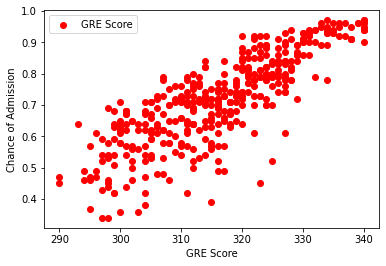

In [12]:
# Visualize the effect of GRE Score on chance of getting an admit  
plt.scatter(X_train["GRE Score"],Y_train, color = "red")
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admission")
plt.legend(["GRE Score"])
plt.show()

## CGPA v/s Admit

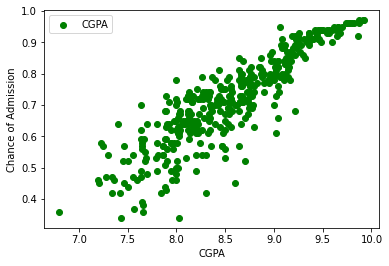

In [13]:
# Visualize the effect of CGPA on chance of of getting an admit. 
plt.scatter(X_train["CGPA"],Y_train, color = "green")
plt.xlabel("CGPA")
plt.ylabel("Chance of Admission")
plt.legend(["CGPA"])
plt.show()

## University Rating v/s Admit

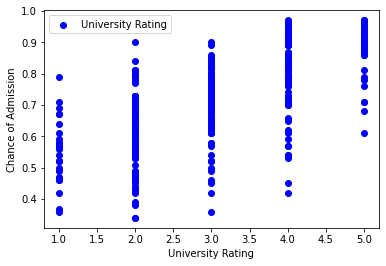

In [14]:
# Visulize the University Rating vs. Chance of Admission.   
plt.scatter(X_train["University Rating"],Y_train, color = "blue")
plt.xlabel("University Rating")
plt.ylabel("Chance of Admission")
plt.legend(["University Rating"])
plt.show()

# Model Building

In [15]:
# Loading the classifier from the sklearn
classifier = LinearRegression()

In [16]:
# Fitting the classifier onto the training data
classifier.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Inference

In [17]:
#Using the classifier to predict the test data and storing it in prediction_of_y array
prediction_of_Y = classifier.predict(X_test)

In [18]:
# Printing the first six predicted values
prediction_of_Y = np.round(prediction_of_Y, decimals = 3)
prediction_of_Y[:6]

array([[0.909],
       [0.904],
       [0.768],
       [0.849],
       [0.717],
       [0.751]])

In [19]:
# Comparision of predicted data(prediction_of_Y) and actual data(Y_test)
Y_test["Predicted chance of Admit"] = prediction_of_Y.tolist()
print(Y_test)

     Chance of Admit  Predicted chance of Admit
151              0.94                   [0.909]
424              0.91                   [0.904]
154              0.80                   [0.768]
190              0.90                   [0.849]
131              0.77                   [0.717]
..                ...                       ...
50               0.76                   [0.684]
264              0.75                   [0.756]
34               0.94                   [0.954]
78               0.44                   [0.509]
223              0.71                   [0.678]

[100 rows x 2 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
# Dropping the added column to keep the dimensions of Y_test intact
Y_test = Y_test.drop(["Predicted chance of Admit"], axis = 1)

# Prediction Visualizations

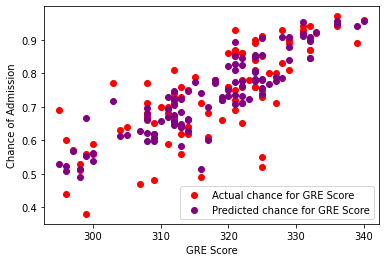

In [21]:
# Visualize the difference in graph for same parameter "GRE Score" for actual chance & prediction chance. 
plt.scatter(X_test["GRE Score"],Y_test, color = "red")
plt.scatter(X_test["GRE Score"], prediction_of_Y, color='purple')
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admission")
plt.legend(["Actual chance for GRE Score","Predicted chance for GRE Score"])
plt.show()

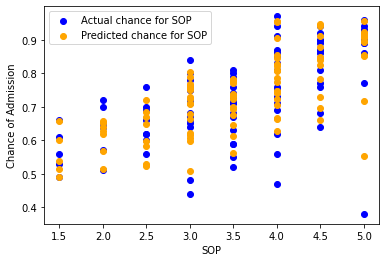

In [22]:
# Visualize the difference in graph for same parameter "SOP" for actual chance & prediction chance.
plt.scatter(X_test["SOP"],Y_test, color = "blue")
plt.scatter(X_test["SOP"], prediction_of_Y, color='orange')
plt.xlabel("SOP")
plt.ylabel("Chance of Admission")
plt.legend(["Actual chance for SOP","Predicted chance for SOP"])
plt.show()

# Model Accuracy

In [23]:
print('Accuracy: {:.2f}'.format(classifier.score(X_test, Y_test)))

Accuracy: 0.80


# Inference on unseen data

In [24]:
# User - specified predictions. Adding my data to X_test dataset:
my_data = X_test.append(pd.Series([332, 107, 5, 4.5, 4.0, 9.34, 0], index = X_test.columns), ignore_index = True)

# Checking the dataframe for our values:
print(my_data[-1:])

     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
100      332.0        107.0                5.0  4.5   4.0  9.34       0.0


In [25]:
#Checking my chances of admission. # As the new record is saved at the end array the result will be the last value. 
my_chance = classifier.predict(my_data)
my_chance[-1]

array([0.8595167])

So this means I have a pretty good chance of around of getting an admit. Similarly you can check the admission chance for more than one record as well.Let's see how to do that.

# Inference on multiple records

In [26]:
# Evaluating admit chance for multiple user-defined records:
list_of_records = [pd.Series([309, 90, 4, 4, 3.5, 7.14, 0], index = X_test.columns),
                   pd.Series([300, 99, 3, 3.5, 3.5, 8.09, 0], index = X_test.columns),
                   pd.Series([304, 108, 4, 4, 3.5, 7.91, 0], index = X_test.columns),
                   pd.Series([295, 113, 5, 4.5, 4, 8.76, 1], index = X_test.columns)]
user_defined = X_test.append(list_of_records, ignore_index= True)
print(user_defined[-4:]) 

chances = classifier.predict(user_defined)
chances[-4:]

     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
100      309.0         90.0                4.0  4.0   3.5  7.14       0.0
101      300.0         99.0                3.0  3.5   3.5  8.09       0.0
102      304.0        108.0                4.0  4.0   3.5  7.91       0.0
103      295.0        113.0                5.0  4.5   4.0  8.76       1.0


array([[0.50153561],
       [0.59913325],
       [0.61218126],
       [0.73653932]])

# Inference on single record

In [27]:
#Checking chances of single record without appending to previous record
single_record_values = {"GRE Score" : [327], "TOEFL Score" : [95], "University Rating" : [4.0], "SOP": [3.5], "LOR" : [4.0], "CGPA": [7.96], "Research": [1]}
single_rec_df = pd.DataFrame(single_record_values, columns = ["GRE Score",  "TOEFL Score",  "University Rating",  "SOP",  "LOR",   "CGPA",  "Research"])
print(single_rec_df)

single_chance = classifier.predict(single_rec_df)
single_chance 

   GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research
0        327           95                4.0  3.5  4.0  7.96         1


array([[0.67561244]])

Add more values to each value list of each parameter in dictionary to get chance of muliple records without appending it to X_test